In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# discover
# first load data
data = pd.read_csv(r'C:\Users\linap\OneDrive\文档\Shared\DSDJ\Take Home Challenges\1.conversion\conversion_data.csv')

In [3]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [5]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [6]:
data.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [7]:
data.nlargest(10,'age')

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1
265167,US,79,1,Direct,1,0
192644,US,77,0,Direct,4,0
154217,US,73,1,Seo,5,0
208969,US,72,1,Direct,4,0
114485,US,70,1,Ads,9,0
301366,UK,70,0,Ads,5,0
57122,UK,69,1,Direct,4,0
168374,China,69,1,Ads,4,0


In [8]:
# eliminate the two data points that are older than 100 in age
data = data[data['age']<100]

<AxesSubplot:xlabel='country', ylabel='count'>

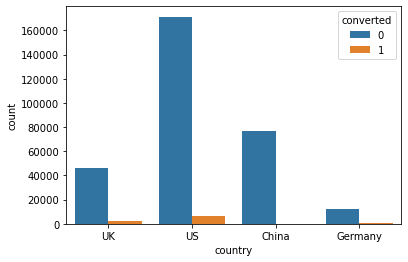

In [9]:
sns.countplot(x='country', hue='converted', data=data)

<function matplotlib.pyplot.show(close=None, block=None)>

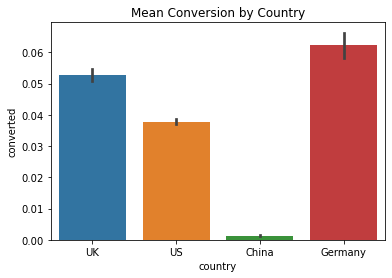

In [10]:
# visualize conversion rate by country
fix, ax = plt.subplots()
sns.barplot(x='country', y='converted',data = data)
ax.set_title('Mean Conversion by Country')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

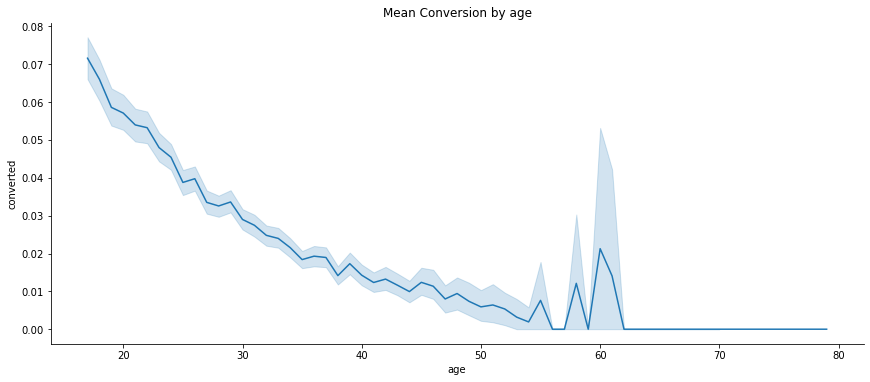

In [11]:
# visualize conversion rate by age
sns.relplot(data = data, x='age', y='converted', aspect=2.4, 
    kind="line").set(title='Mean Conversion by age')
plt.show

In [12]:
# It seems there are two age peaks for conversion rate, one is teen or early 20s, another one closer to 60,
# although elderly has lower conversion rate than youth

<function matplotlib.pyplot.show(close=None, block=None)>

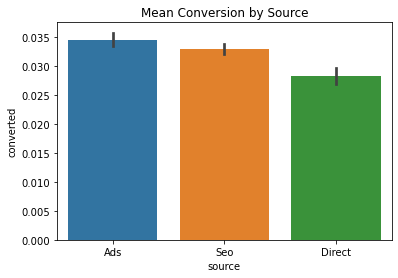

In [13]:
# visualize conversion rate by source
fix, ax = plt.subplots()
sns.barplot(x='source', y='converted',data = data)
ax.set_title('Mean Conversion by Source')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

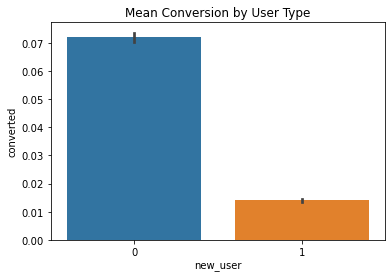

In [14]:
# visualize conversion rate by user type
fix, ax = plt.subplots()
sns.barplot(x='new_user', y='converted',data = data)
ax.set_title('Mean Conversion by User Type')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

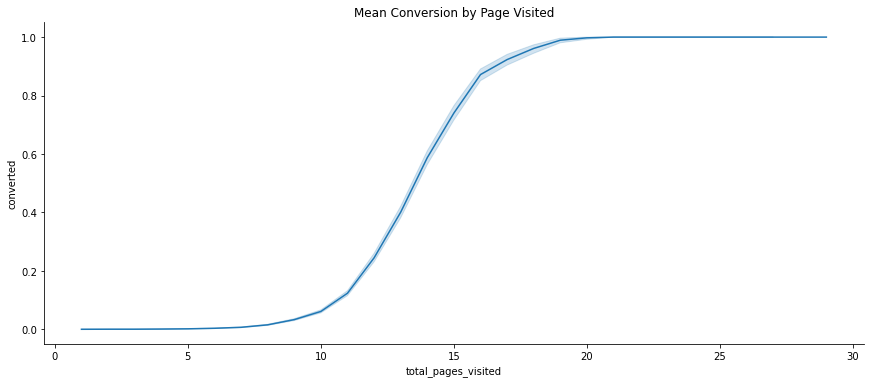

In [15]:
# visualize conversion rate by page visited
sns.relplot(data = data, x='total_pages_visited', y='converted', aspect=2.4, 
    kind="line").set(title='Mean Conversion by Page Visited')
plt.show

In [16]:
''' Since the task is to predict binary results, I can think of three modelling choices:
a. logistic regression
b. decision tree
c. random forest

I am going to pick random forest due to 
1) its ability to provide high accuracy due to ensemble and cross-validation
2) it handles both categorical and numerical variables well
3) No need to normalize inputs
'''

' Since the task is to predict binary results, I can think of three modelling choices:\na. logistic regression\nb. decision tree\nc. random forest\n\nI am going to pick random forest due to \n1) its ability to provide high accuracy due to ensemble and cross-validation\n2) it handles both categorical and numerical variables well\n3) No need to normalize inputs\n'

In [17]:
x = data.drop('converted', axis = 1)
y = data['converted']

In [18]:
# One-hot encode the data using pandas get_dummies
x = pd.get_dummies(x)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [20]:
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train);

In [21]:
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)

In [22]:
cm = pd.DataFrame(confusion_matrix(y_test, predictions))
cm.columns = ['actual','pred']

In [23]:
print(cm)

   actual  pred
0   76147   406
1     783  1714


In [24]:
print(classification_report(y_test, predictions, target_names=['actual','pred']))

              precision    recall  f1-score   support

      actual       0.99      0.99      0.99     76553
        pred       0.81      0.69      0.74      2497

    accuracy                           0.98     79050
   macro avg       0.90      0.84      0.87     79050
weighted avg       0.98      0.98      0.98     79050



In [25]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

In [26]:
feature_importances = [(name, round(importance, 2)) for name, importance in zip(list(x_train.columns), importances)]
feature_importances = pd.DataFrame(sorted(feature_importances, key = lambda x: x[1], reverse = True))

In [27]:
feature_importances.columns = ['variable_name','importance']

<function matplotlib.pyplot.show(close=None, block=None)>

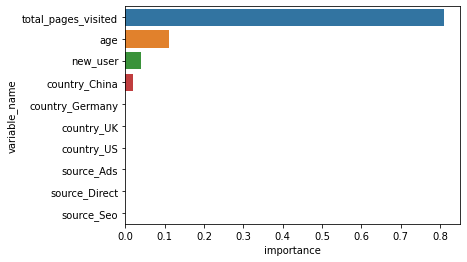

In [28]:
# visualize feature importance
sns.barplot(x='importance', y='variable_name', data = feature_importances)
ax.set_title('Feature Importance Ranking')
plt.show